In [10]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Importing dataframes, where df is all combined, df1 is print, df2 is print 2,..
df = pd.read_csv("df.csv") 
df1 = pd.read_csv("df1.csv")
df2 = pd.read_csv("df2.csv")
df3 = pd.read_csv("df3.csv")

# Investigating acquisition time delays

In [12]:
df[['timetime', 'timeperf_counter']].describe().style.set_caption("Markforged acquisition delays").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '15px')
    ]
}])

,timetime,timeperf_counter
count,31074.000000,31074.000000
mean,0.145956,0.145605
std,0.032758,0.032829
min,0.093728,0.102166
25%,0.128090,0.127896
50%,0.138905,0.137853
75%,0.155569,0.154943
max,2.154236,2.154601


In [13]:
df[['timeperf_counter']].describe().style.set_caption("Markforged").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,timeperf_counter
count,31074.000000
mean,0.145605
std,0.032829
min,0.102166
25%,0.127896
50%,0.137853
75%,0.154943
max,2.154601


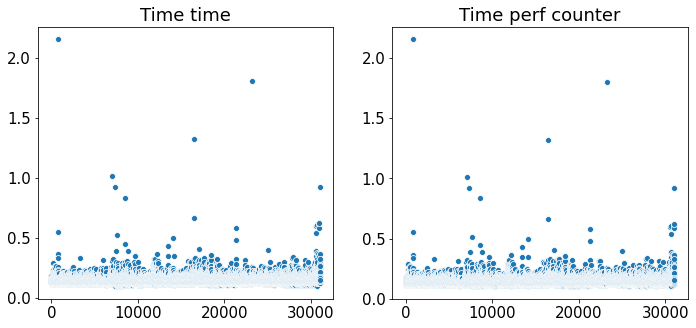

In [14]:
fig = plt.figure(figsize = (18,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
sns.scatterplot(data=df['timetime'])
ax1.title.set_text('Time time')

ax2 = plt.subplot(1,3,2)
ax2.title.set_text('Time perf counter')
sns.scatterplot(data=df['timeperf_counter'])

In [15]:
#Investigating difference between Time time and Time perf counter
df_delays = df[['timetime', 'timeperf_counter']]
df_delays = df_delays.assign(Delay_difference = df_delays['timetime'] - df['timeperf_counter'])
df_delays.describe()

,timetime,timeperf_counter,Delay_difference
count,31074.000000,31074.000000,31074.000000
mean,0.145956,0.145605,0.000351
std,0.032758,0.032829,0.002873
min,0.093728,0.102166,-0.015448
25%,0.128090,0.127896,-0.000270
50%,0.138905,0.137853,-0.000018
75%,0.155569,0.154943,0.000310
max,2.154236,2.154601,0.015398


# Investigating Temperature variaiton

In [16]:
df[['Hot_end_temperature']].describe()

,Hot_end_temperature
count,31074.000000
mean,274.591717
std,1.015395
min,271.000000
25%,274.000000
50%,274.000000
75%,275.000000
max,279.000000


In [17]:
# Investigating statistical description of hot end temperature for each print 
hot_end_t = df[['Hot_end_temperature','Part']]
hot_end_t.groupby('Part').describe()


Hot_end_temperature                                                    \
                   count        mean       std    min    25%    50%    75%   
Part                                                                         
1                10401.0  274.671858  0.897167  271.0  274.0  274.0  276.0   
2                10311.0  274.542915  1.086232  271.0  274.0  274.0  276.0   
3                10362.0  274.559834  1.048915  273.0  274.0  275.0  275.0   

             
        max  
Part         
1     279.0  
2     278.0  
3     276.0

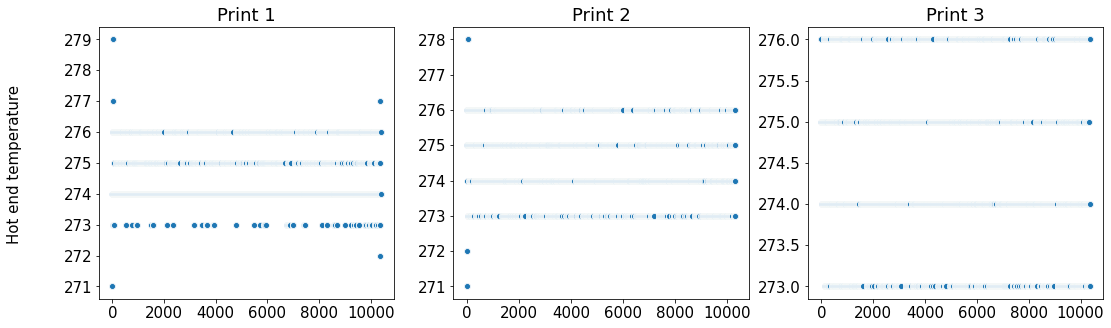

In [18]:
#Ploting scatterplot of temperature for each print 
#Data is plotted chronologically seems like, therefore can use this to identify when abnormal temperature values occured

fig = plt.figure(figsize = (18,5))

#Row, Column,plot number
#Coutplot
ax1 = plt.subplot(1,3,1)
sns.scatterplot(data=df1['Hot_end_temperature'])
ax1.title.set_text('Print 1')

ax2 = plt.subplot(1,3,2)
ax2.title.set_text('Print 2')
sns.scatterplot(data=df2['Hot_end_temperature'])

ax3 = plt.subplot(1,3,3)
ax3.title.set_text('Print 3')
sns.scatterplot(data=df3['Hot_end_temperature'])

fig.text(0.5, 0.04, '', ha='center', va='center')
fig.text(0.06, 0.5, 'Hot end temperature', ha='center', va='center', rotation='vertical')
plt.rcParams["font.size"] = "15"

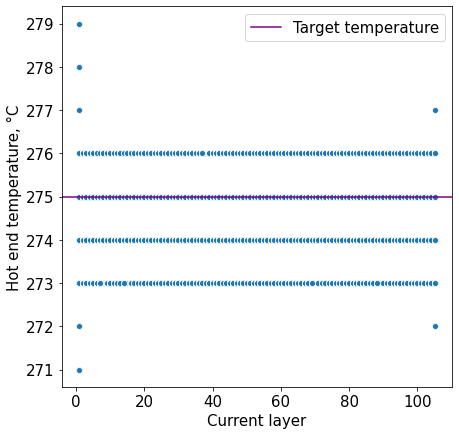

In [19]:
#Scatterplot of hot end temperature based on current layer 
fig, ax = plt.subplots(1, figsize=(7, 7))
sns.scatterplot( x = 'Current_layer', y = 'Hot_end_temperature', data = df)
ax.axhline(275, color='purple', label='Target temperature')
legend = plt.legend(loc ='upper right')
legend.set_zorder(3)
ax.set(xlabel ="Current layer", ylabel = "Hot end temperature, \xb0C")
#plt.style.use("dark_background")
  
plt.show()

In [20]:

#Function uses time from date to convert to process time 
#This funciton returns final value to be NAN
def process_time(df):
    df['Date'] = pd.to_datetime(df['Date'])

    #Create column of process time based on date time
    df['Process_time'] = df['Date'].iloc[-1] - df['Date'].shift()
    df['Process_time'] = df['Process_time'].fillna(pd.Timedelta(seconds=0))
    df['Process_time'] = df['Process_time'].dt.seconds

    #Invert column so time start from 0
    df.Process_time = df.Process_time.values[::-1]
    
process_time(df1)
process_time(df2)
process_time(df3)


#Merge data frames and generate new indexes
data_frames = [df1, df2, df3]

df_new = pd.concat(data_frames,ignore_index=True)

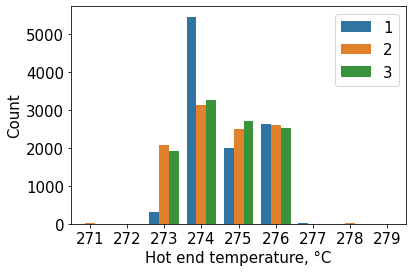

In [21]:
#Countplot of temperature for each print
ax = sns.countplot('Hot_end_temperature',hue = 'Part', data = df_new)
ax.set(xlabel='Hot end temperature, \xb0C', ylabel='Count')
plt.legend(loc ='upper right')

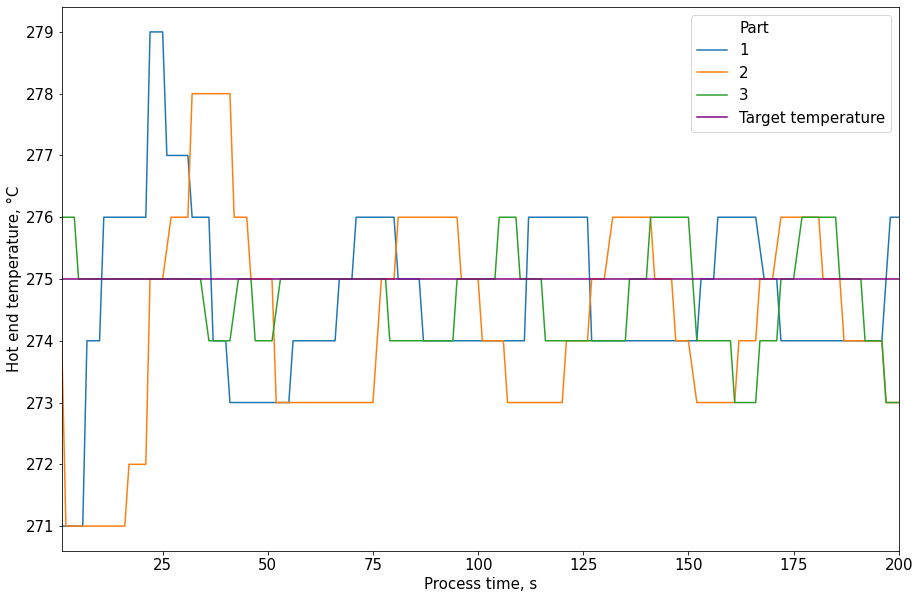

In [22]:
#Line plot of hot end temperature for each print at the start of the process
fig, ax = plt.subplots(1, figsize=(15, 10))
sns.lineplot(data=df_new, x='Process_time', y="Hot_end_temperature", hue="Part", ci=None, palette=["C0", "C1", "C2"])
ax.axhline(275, color='purple', label='Target temperature')
ax.set_xlim(left=1, right=200)
legend = plt.legend(loc ='upper right')
legend.set_zorder(3)
ax.set(xlabel ="Process time, s", ylabel = "Hot end temperature, \xb0C")
#plt.style.use("dark_background")
  
plt.show()

In [33]:
#Comparing print data such as hot end temperature, and process time for CMM data.

Parts = {'Part1': [df1.Process_time.max(),
                  df1.Hot_end_temperature.mean(), 
                  df1.Hot_end_temperature.min(),
                  df1.Hot_end_temperature.max(),
                   
                  df1.Hot_end_temperature.std(),],
        'Part2': [df2.Process_time.max(),
                  df2.Hot_end_temperature.mean(),
                  df2.Hot_end_temperature.min(),
                  df2.Hot_end_temperature.max(),
                  df2.Hot_end_temperature.std(),],
        'Part3':[df3.Process_time.max(),
                 df2.Hot_end_temperature.mean(),
                  df3.Hot_end_temperature.min(),
                  df3.Hot_end_temperature.max(),
                  df3.Hot_end_temperature.std(),],
        }


df_cmm = pd.DataFrame(Parts, columns = ['Part1','Part2','Part3'], index=['Total process time (s)',
                                                                    'Hot end temperature\xb0C mean',    
                                                                    'Hot end temperature\xb0C min',
                                                                    'Hot end temperature\xb0C max',
                                                                    'Hot end temperature\xb0C std',])
#Option to change which shows only 2 decimals
pd.options.display.float_format = '{:,.2f}'.format
df_cmm.style.set_caption("Markforged").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '20px')
    ]
}])

,Part1,Part2,Part3
Total process time (s),12179.000000,12181.000000,12181.000000
Hot end temperature°C mean,274.671858,274.542915,274.542915
Hot end temperature°C min,271.000000,271.000000,273.000000
Hot end temperature°C max,279.000000,278.000000,276.000000
Hot end temperature°C std,0.897167,1.086232,1.048915
